In [34]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the dataset 
dataset=pd.read_csv("Iris.csv")

In [4]:
dataset=dataset.drop(['Id'],axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Dimension of the dataset 
dataset.shape

(150, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#To check whether dataset contains NULL value or not
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#Hence,dataset doesn't contain any NULL values
dataset.drop_duplicates(inplace=True)

In [10]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

D:\anaconda1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


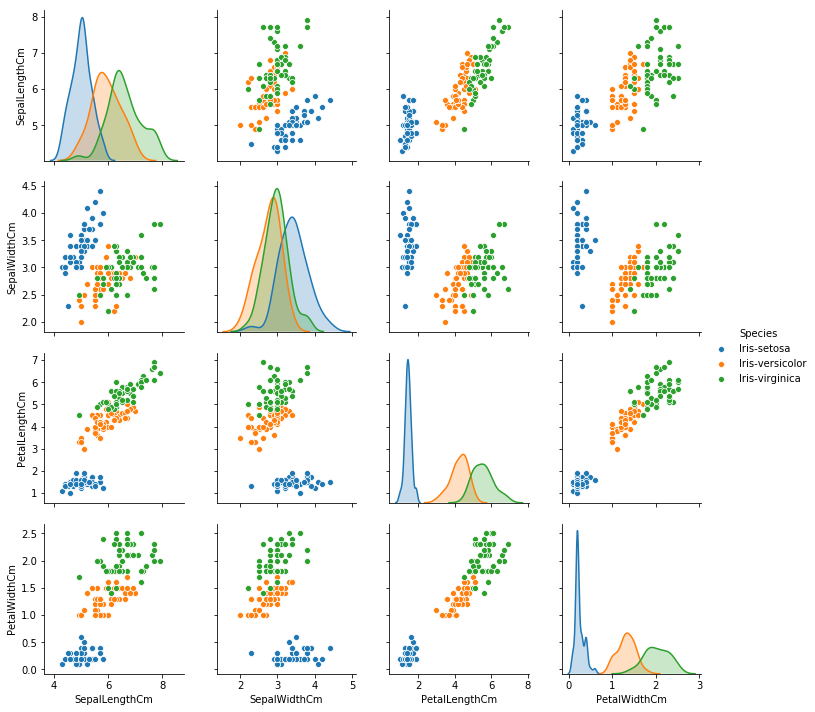

In [11]:
sns.pairplot(dataset,hue='Species')

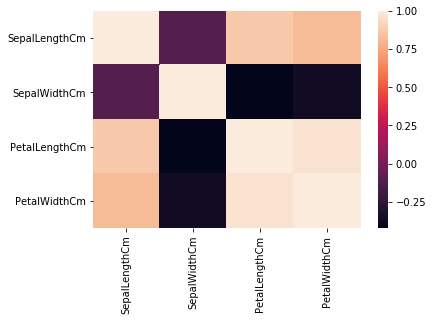

In [12]:
#heat map to show correlation 
sns.heatmap(dataset.corr())

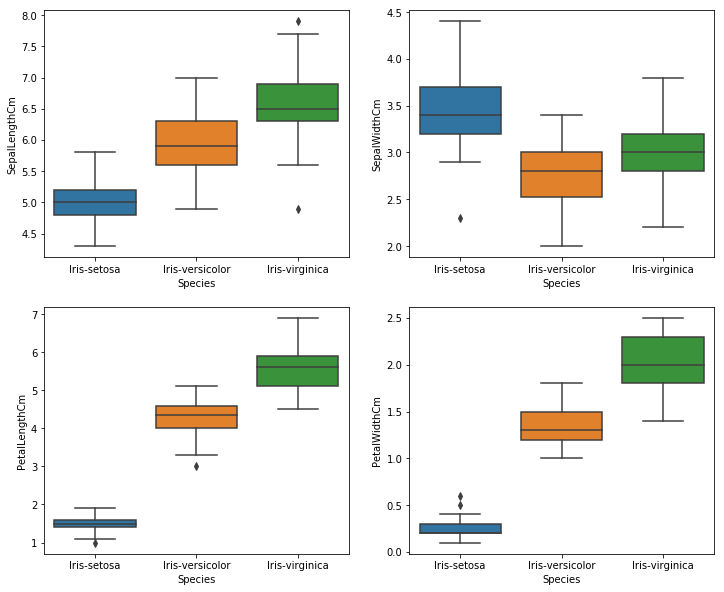

In [13]:
#Petal Length is highly related to petal width 
#Sepal Length is not related to sepal width
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=dataset)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=dataset)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=dataset)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=dataset)

In [14]:
#DATA PREPERATION FOR MODEL BUILDING 
#shuffling of dataset
from sklearn.utils import shuffle
dataset=shuffle(dataset)

X=dataset.iloc[:,0:4];
y=dataset.iloc[:,4:5];

In [33]:
#classifying the y-values into numbers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
X_train

array([[-0.89363673,  0.49795984, -1.1440436 , -0.90690621],
       [-1.83996685, -0.16464801, -1.47696634, -1.43334253],
       [ 0.28927591, -0.16464801,  0.46508298,  0.27757552],
       [ 0.40756717, -0.3855173 ,  0.29862161,  0.14596643],
       [ 1.11731476, -0.16464801,  0.96446709,  1.19883908],
       [ 0.28927591, -0.16464801,  0.63154435,  0.80401184],
       [ 0.52585844, -1.26899444,  0.63154435,  0.4091846 ],
       [-0.77534547,  2.26491412, -1.25501785, -1.43334253],
       [ 0.76244097, -0.60638658,  0.46508298,  0.4091846 ],
       [ 1.35389729,  0.27709056,  0.5205701 ,  0.27757552],
       [-0.18388915,  2.92752198, -1.25501785, -1.03851529],
       [-0.89363673,  1.60230627, -1.03306935, -1.03851529],
       [ 2.18193614, -1.04812515,  1.74128682,  1.46205724],
       [ 0.99902349, -1.26899444,  1.13092846,  0.80401184],
       [ 0.52585844, -1.26899444,  0.68703147,  0.93562092],
       [-0.89363673,  0.71882913, -1.25501785, -1.30173345],
       [-0.30218041, -0.

In [22]:
y_train

array([0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0])

In [23]:
#Predicting the new output for test set 
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0,
       2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2])

In [24]:
#creating confusion metric
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 12]], dtype=int64)

In [25]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.972972972972973


In [26]:
#Classification report 
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        12

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.98        37
weighted avg       0.98      0.97      0.97        37



In [27]:
#Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=20)
model=classifier.fit(X_train,y_train)

In [28]:
f=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
l=['Iris-Setosa','Iris-Vergicolor','Iris-Versinica']
f

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

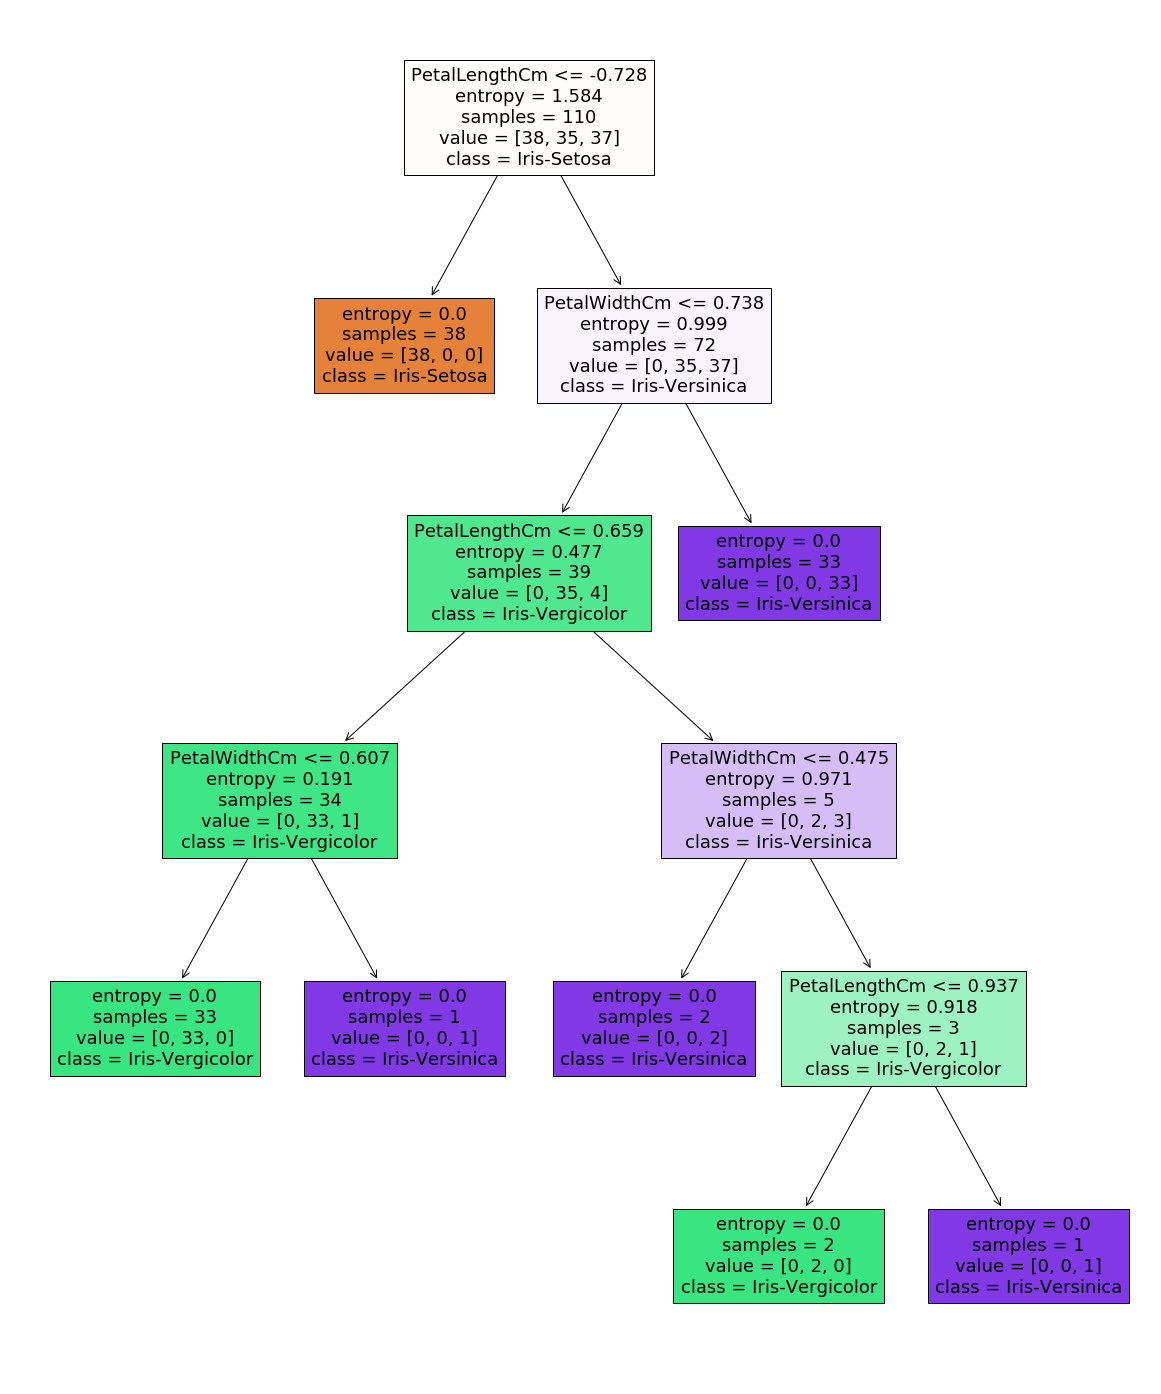

In [32]:
from sklearn import tree 
fig=plt.figure(figsize=(20,25))
graph=tree.plot_tree(classifier,feature_names=f,class_names=l,filled=True)